In [1]:
"""
@author: Nicolò Perello
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from DFMC_model import DFMC_model
from calibration.plot_analysis import plot_time_series

# Interactive run

In [2]:
time_series = pd.read_csv('time_series_sample.csv')
time_series

,time,Temp,Hum,Wspeed,Rain,DFMC
0,2017-12-15 17:00:00,18.9,65,1.9,0.0,10.071942
1,2017-12-15 18:00:00,16.5,73,1.2,0.0,10.233393
2,2017-12-15 19:00:00,13.9,84,1.3,0.0,10.474485
3,2017-12-15 20:00:00,12.4,88,1.9,0.0,10.873440
4,2017-12-15 21:00:00,12.0,95,1.1,0.0,11.268855
...,...,...,...,...,...,...
235,2017-12-25 12:00:00,13.8,95,3.3,0.3,30.795848
236,2017-12-25 13:00:00,14.9,91,4.0,0.0,28.005760
237,2017-12-25 14:00:00,16.2,73,1.4,0.0,25.149701
238,2017-12-25 15:00:00,17.3,62,1.3,0.0,22.178988


In [3]:
# fuel-specific parameters
sat = 45  # saturation level [%]
T0 = 10  # response time [h]
# time step
dt = 1  # h

# initialization
time_series.loc[0, 'DFMC_model'] = sat/2
time_series.loc[0, 'phase'] = -9999
time_series.loc[0, 'EMC'] = -9999
time_series.loc[0, 'K_const'] = -9999

# RUN
for tt in range(1, len(time_series)):
    time_series.loc[tt, 'DFMC_model'], time_series.loc[tt, 'phase'],\
        time_series.loc[tt, 'EMC'], time_series.loc[tt, 'K_const'] = DFMC_model.compute_DFMC(
            moisture=time_series.loc[tt-1, 'DFMC_model'],
            rain=time_series.loc[tt, 'Rain'],
            temp=time_series.loc[tt, 'Temp'],
            hum=time_series.loc[tt, 'Hum'],
            wspeed=time_series.loc[tt, 'Wspeed'],
            saturation=sat,
            T0=T0,
            dt=dt
        )
time_series

,time,Temp,Hum,Wspeed,Rain,DFMC,DFMC_model,phase,EMC,K_const
0,2017-12-15 17:00:00,18.9,65,1.9,0.0,10.071942,22.500000,-9999.0,-9999.000000,-9999.000000
1,2017-12-15 18:00:00,16.5,73,1.2,0.0,10.233393,21.686981,-1.0,11.337071,11.620280
2,2017-12-15 19:00:00,13.9,84,1.3,0.0,10.474485,21.167807,-1.0,14.512282,12.236749
3,2017-12-15 20:00:00,12.4,88,1.9,0.0,10.873440,20.806402,-1.0,16.402806,11.983171
4,2017-12-15 21:00:00,12.0,95,1.1,0.0,11.268855,20.772126,-1.0,20.335935,13.144236
...,...,...,...,...,...,...,...,...,...,...
235,2017-12-25 12:00:00,13.8,95,3.3,0.3,30.795848,34.065985,2.0,-9999.000000,-9999.000000
236,2017-12-25 13:00:00,14.9,91,4.0,0.0,28.005760,32.807705,-1.0,16.879405,10.533465
237,2017-12-25 14:00:00,16.2,73,1.4,0.0,25.149701,31.423329,-1.0,11.430670,11.448739
238,2017-12-25 15:00:00,17.3,62,1.3,0.0,22.178988,29.954129,-1.0,9.675946,10.971429


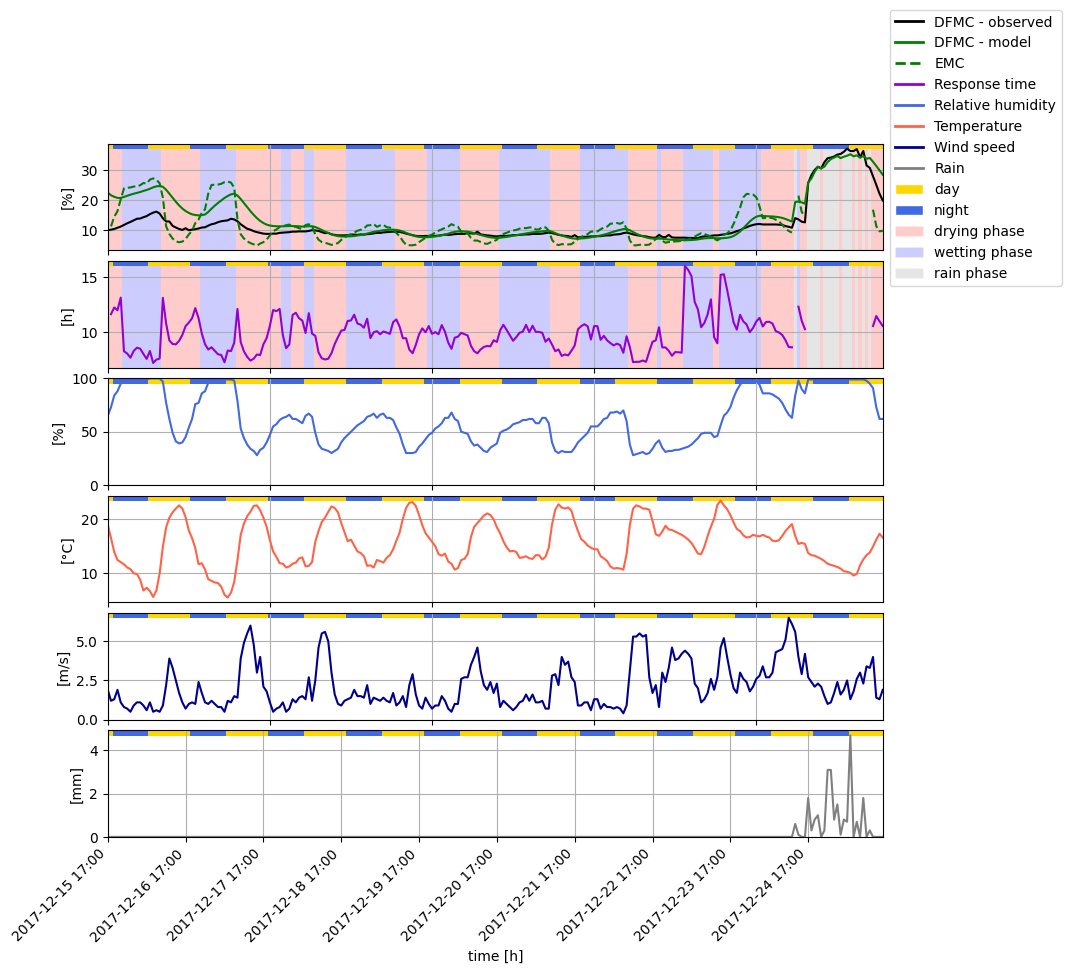

In [4]:
fig = plot_time_series(time_series)
plt.show()